In [1]:
import numpy as np
import pandas as pd

def calc_cagr(begin, final, years):
    if final < 0:
        return (-1) * (((abs(final) + 2 * begin) / begin) ** (1 / years) - 1)
    else:
        return (final / begin) ** (1 / years) - 1
    
xbtusd_vanila_makerfee = pd.read_pickle("xbtusd-vanila-makerfee")
xbtusd_vanila_takerfee = pd.read_pickle("xbtusd-vanila-takerfee")

xbtusd_normalization_makerfee = pd.read_pickle("xbtusd-normalization-makerfee")
xbtusd_normalization_takerfee = pd.read_pickle("xbtusd-normalization-takerfee")

xbtusd_standardization_makerfee = pd.read_pickle("xbtusd-standardization-makerfee")
xbtusd_standardization_takerfee = pd.read_pickle("xbtusd-standardization-takerfee")

xbtusd_wdop_makerfee = pd.read_pickle("xbtusd-wdop-makerfee")
xbtusd_wdop_takerfee = pd.read_pickle("xbtusd-wdop-takerfee")

In [2]:
weights = [1, 1, 1, 1]

net_equity_makerfee = weights[0] * xbtusd_vanila_makerfee + weights[1] * xbtusd_normalization_makerfee + \
    weights[2] * xbtusd_standardization_makerfee + weights[3] * xbtusd_wdop_makerfee

net_equity_takerfee = weights[0] * xbtusd_vanila_takerfee + weights[1] * xbtusd_normalization_takerfee + \
    weights[2] * xbtusd_standardization_takerfee + weights[3] * xbtusd_wdop_makerfee

max_position = np.sum(weights * 10000) # no leverage (1x leverage)

<AxesSubplot:xlabel='timestamp'>

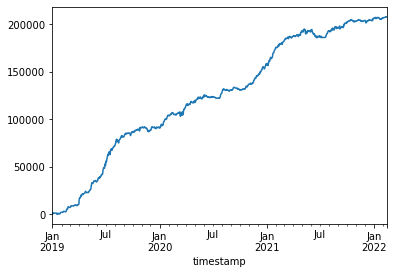

In [3]:
net_equity_makerfee.plot()

<AxesSubplot:xlabel='timestamp'>

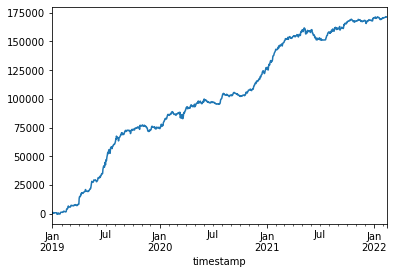

In [4]:
net_equity_takerfee.plot()

In [5]:
df = pd.read_pickle('data')

In [6]:
close = df['close'].resample('1d').last()

Start date            2019-01-01
End date              2022-02-15
Time period (days)          1141
Sharpe ratio            3.829854
CAGR                    0.703529
RRR                     2.633489
Maximum drawdown        0.267147
dtype: object


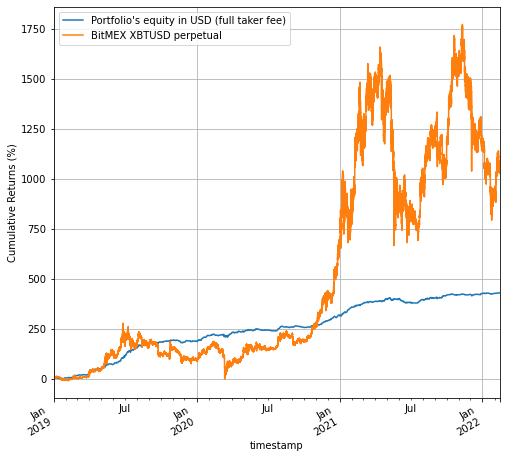

In [7]:
equity = net_equity_takerfee

returns = equity.diff() / max_position
sr = np.divide(returns.mean(), returns.std()) * np.sqrt(365)

Roll_Max = equity.cummax()
Daily_Drawdown = (equity - Roll_Max) / max_position
Max_Daily_Drawdown = Daily_Drawdown.cummin()

period = (equity.index[-1] - equity.index[0]).days

print(pd.Series({
    'Start date': equity.index[0].strftime('%Y-%m-%d'),
    'End date': equity.index[-1].strftime('%Y-%m-%d'),
    'Time period (days)': period,
    'Sharpe ratio': sr,
    'CAGR': calc_cagr(max_position, max_position + equity[-1], period / 365),
    'RRR': calc_cagr(max_position, max_position + equity[-1], period / 365) / -Max_Daily_Drawdown.min(),
    'Maximum drawdown': -Max_Daily_Drawdown.min(),
}))

import matplotlib.pyplot as plt
plt.figure(figsize=(8, 8))
ax1 = (equity / max_position * 100).plot()
ax2 = ((df['close'] / df['close'][0] - 1) * 100).plot()
ax1.set_ylabel('Cumulative Returns (%)')
ax1.legend(["Portfolio's equity in USD (full taker fee)", 'BitMEX XBTUSD perpetual'])
ax1.grid()

Start date            2019-01-01
End date              2022-02-15
Time period (days)          1141
Sharpe ratio            4.590531
CAGR                    0.792129
RRR                     3.450808
Maximum drawdown        0.229549
dtype: object


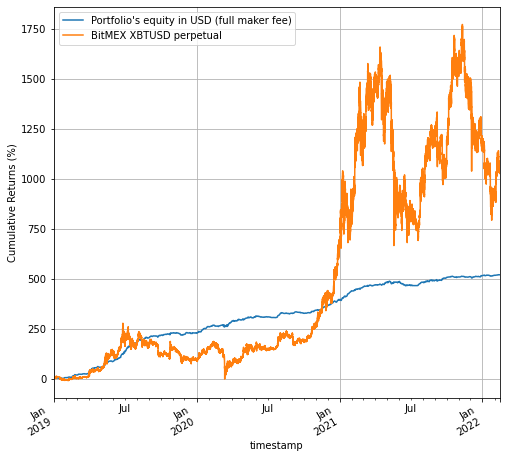

In [8]:
equity = net_equity_makerfee

returns = equity.diff() / max_position
sr = np.divide(returns.mean(), returns.std()) * np.sqrt(365)

Roll_Max = equity.cummax()
Daily_Drawdown = (equity - Roll_Max) / max_position
Max_Daily_Drawdown = Daily_Drawdown.cummin()

period = (equity.index[-1] - equity.index[0]).days

print(pd.Series({
    'Start date': equity.index[0].strftime('%Y-%m-%d'),
    'End date': equity.index[-1].strftime('%Y-%m-%d'),
    'Time period (days)': period,
    'Sharpe ratio': sr,
    'CAGR': calc_cagr(max_position, max_position + equity[-1], period / 365),
    'RRR': calc_cagr(max_position, max_position + equity[-1], period / 365) / -Max_Daily_Drawdown.min(),
    'Maximum drawdown': -Max_Daily_Drawdown.min(),
}))

import matplotlib.pyplot as plt
plt.figure(figsize=(8, 8))
ax1 = (equity / max_position * 100).plot()
ax2 = ((df['close'] / df['close'][0] - 1) * 100).plot()
ax1.set_ylabel('Cumulative Returns (%)')
ax1.legend(["Portfolio's equity in USD (full maker fee)", 'BitMEX XBTUSD perpetual'])
ax1.grid()

<AxesSubplot:xlabel='timestamp'>

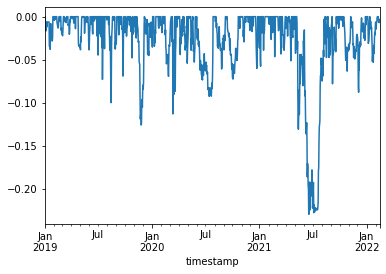

In [9]:
Daily_Drawdown.plot()